<a href="https://colab.research.google.com/github/Diwash17/Titanic-Survival-Prediction/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


In [139]:
df=pd.read_csv("/content/train.csv")

In [140]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [141]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
df.size

10692

In [143]:
df.shape

(891, 12)

In [144]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.55,C87,S


In [145]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [147]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [148]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
df.drop(["PassengerId","Cabin","Ticket","Name"],axis=1,inplace=True)

In [150]:
df["Age"].fillna(df["Age"].median(),inplace=True)


In [151]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [152]:
df.drop(["Embarked"],axis=1,inplace=True)

In [153]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [154]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [155]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [156]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
dtype: int64

In [157]:
df.iloc[100]

Survived         0
Pclass           3
Sex         female
Age           28.0
SibSp            0
Parch            0
Fare        7.8958
Name: 100, dtype: object

In [158]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [159]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [160]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Univarient Analysis

In [161]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [162]:
plot=px.pie(df,"Sex")
plot.update_layout(title='Piechart showing distritution of passenger on the basic of sex' ,title_x=0.5)

In [163]:
plot=px.pie(df,"Pclass")
plot.update_layout(title='Piechart showing distritution of passenger on the basic of Pclass' ,title_x=0.5)




Text(0.5, 1.0, 'Count plot showing survival of passanger in titanic ship')

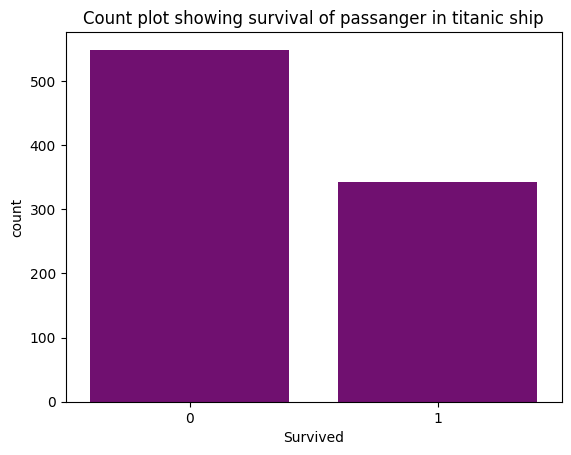

In [164]:
sns.countplot(x="Survived",data=df, linewidth=2,color="purple")
plt.title("Count plot showing survival of passanger in titanic ship")

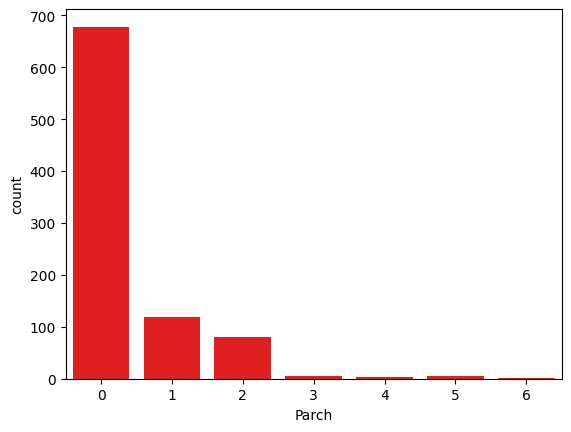

In [165]:
sns.countplot(x="Parch",data=df,color="red",linewidth=3)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

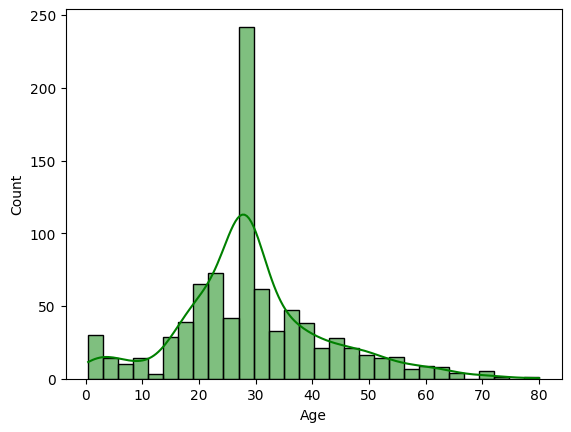

In [166]:
sns.histplot(df["Age"],kde=True,color="green")

Bivarient analysis

Using crosstab for contiginity

In [167]:
pd.crosstab(df["Survived"],df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [168]:
pd.crosstab(df["Survived"],df["Pclass"],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

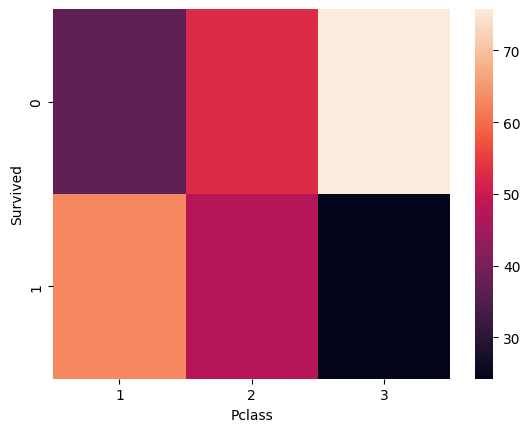

In [169]:
sns.heatmap(pd.crosstab(df["Survived"],df["Pclass"],normalize='columns')*100)

In [170]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [171]:
df[df["SibSp"] == 5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
59,0,3,male,11.0,5,2,46.9
71,0,3,female,16.0,5,2,46.9
386,0,3,male,1.0,5,2,46.9
480,0,3,male,9.0,5,2,46.9
683,0,3,male,14.0,5,2,46.9


In [172]:
df[df["SibSp"] == 8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
159,0,3,male,28.0,8,2,69.55
180,0,3,female,28.0,8,2,69.55
201,0,3,male,28.0,8,2,69.55
324,0,3,male,28.0,8,2,69.55
792,0,3,female,28.0,8,2,69.55
846,0,3,male,28.0,8,2,69.55
863,0,3,female,28.0,8,2,69.55


In [173]:
pd.crosstab(df['Survived'],df['Sex'],normalize= 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

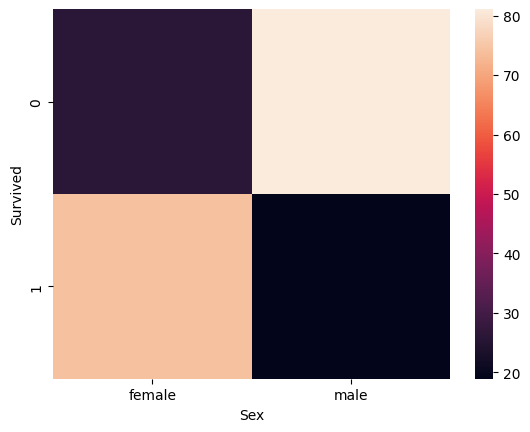

In [174]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize= 'columns')*100)

Multivarient Analysis

In [195]:
plot=px. sunburst(
    df,
    path=['Survived', 'Sex', 'Pclass'],

)
plot.update_layout(title='Sunburst Chart for survived passenger' ,title_x=0.5)

In [203]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



fig = px.sunburst(
    df,
    path=['Survived', 'Sex', 'AgeGroup'],
)


fig.update_layout(
    title='Sunburst Chart for Survived Passenger',
    title_x=0.5,
    width=700,  # Increase the width of the figure
    height=700  # Increase the height of the figure
)


fig.show()

In [175]:
#!pip install ydata_profiling

In [176]:
#from ydata_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

Feature Engineering

In [177]:
# Create a family size variable including the passenger themselves
df['FamilySize'] =df["SibSp"] + df["Parch"]+1
print(df["FamilySize"].value_counts())

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64


In [178]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,2
2,1,3,female,26.0,0,0,7.9250,1
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1
887,1,1,female,19.0,0,0,30.0000,1
888,0,3,female,28.0,1,2,23.4500,4
889,1,1,male,26.0,0,0,30.0000,1


In [179]:
# Discretize family size
df.loc[df["FamilySize"] == 1, "FsizeD"] = 'singleton'
df.loc[(df["FamilySize"] > 1)  &  (df["FamilySize"] < 5) , "FsizeD"] = 'small'
df.loc[df["FamilySize"] >4, "FsizeD"] = 'large'

df.loc[df["FamilySize"] == 1, "FsizeD"] = 'singleton'
df.loc[(df["FamilySize"] >1) & (df["FamilySize"] <5) , "FsizeD"] = 'small'
df.loc[df["FamilySize"] >4, "FsizeD"] = 'large'
print(df["FsizeD"].unique())
print(df["FsizeD"].value_counts())

['small' 'singleton' 'large']
FsizeD
singleton    537
small        292
large         62
Name: count, dtype: int64


In [180]:
df["FamilySize"].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [181]:
(df["Fare"] ==0).sum()

15

In [182]:
df["Fare"].min()

0.0

In [183]:
df["Fare"].max()

512.3292

In [184]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,FsizeD
0,0,3,male,22.0,1,0,7.2500,2,small
1,1,1,female,38.0,1,0,71.2833,2,small
2,1,3,female,26.0,0,0,7.9250,1,singleton
3,1,1,female,35.0,1,0,53.1000,2,small
4,0,3,male,35.0,0,0,8.0500,1,singleton
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1,singleton
887,1,1,female,19.0,0,0,30.0000,1,singleton
888,0,3,female,28.0,1,2,23.4500,4,small
889,1,1,male,26.0,0,0,30.0000,1,singleton


In [185]:
df.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'FamilySize',
 'FsizeD']

In [186]:
df.nunique()

Survived        2
Pclass          3
Sex             2
Age            88
SibSp           7
Parch           7
Fare          248
FamilySize      9
FsizeD          3
dtype: int64

In [187]:
df.duplicated().sum()

119

Train test split

In [209]:
from sklearn.model_selection import train_test_split


In [212]:
X=df.drop("Survived", axis= 1)
y=df["Survived"]
X_train,X_test,y_train_y_test=train_test_split(X,y,test_size=0.2,random_state=42)


ValueError: too many values to unpack (expected 3)

Standarazation

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler=StandardScaler()
scaler

StandardScaler()